### Problem Statement Understanding

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

### Business Goal:

#### The given situation 
The company has witnessed considarably dip in revenues during Covid lockdows and suffered heavy losses and is strugling to servive

We are required to model the demand for shared bikes with the available independent variables.

It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.  

## Data understanding, preparation and EDA
### Section 1: Data Preparation

In [230]:
# importing required library
import pandas as pd #to read file as dataframe
import numpy as np # for numerical manuplation 
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [231]:
#Loading DataSet
bikeSharing_df = pd.read_csv("day.csv")
bikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data dictionary
===================<br>
Dataset characteristics <br> 
===================
	
#day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Section 2: Basic Observations and Data Understanding

In [232]:
print(f'Given dataset contains {bikeSharing_df.shape[0]} rows and {bikeSharing_df.shape[1]} columns.')

Given dataset contains 730 rows and 16 columns.


In [233]:
# Checking null values
bikeSharing_df.isnull().sum()
#No null data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [234]:
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Fortunately we don't have any null or missing data

In [235]:
# checking duplicate
len(bikeSharing_df[bikeSharing_df.duplicated()])
#no duplicate

0

In [236]:
# statistical info
bikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [237]:
# unique values
bikeSharing_df.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [238]:
bikeSharing_df = bikeSharing_df.rename(columns={'weathersit':'weather','yr':'year',
                                               'mnth':'month',
                                               'hum':'humidity',
                                               'cnt':'count'})

In [239]:
bikeSharing_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Transforming season, weather, mont and weekday columns based on above logic

In [240]:
# Transforming weathersit feature:
bikeSharing_df['weather'] = bikeSharing_df['weather'].map({1:'Clear to Partly Cloudy', 2:'Mist and Cloudy',3:'Light Snow or Light Rain',4:'Heavy Rain or, Snow and Fog'})

#Transforming season feature
bikeSharing_df['season']=bikeSharing_df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

#Mapping Month feature:
bikeSharing_df['month']=bikeSharing_df['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

#Mapping weekday feature
bikeSharing_df['weekday']=bikeSharing_df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'wed',4:'Thu',5:'Fri',6:'Sat'})

bikeSharing_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,wed,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [241]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)


In [242]:
bikeSharing_df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,wed,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [164]:
bikeSharing_df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [165]:
bikeSharing_df.weather.value_counts()

Clear to Partly Cloudy      463
Mist and Cloudy             246
Light Snow or Light Rain     21
Name: weather, dtype: int64

In [166]:
bikeSharing_df.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
year,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


### Section3: Visualizing the Data

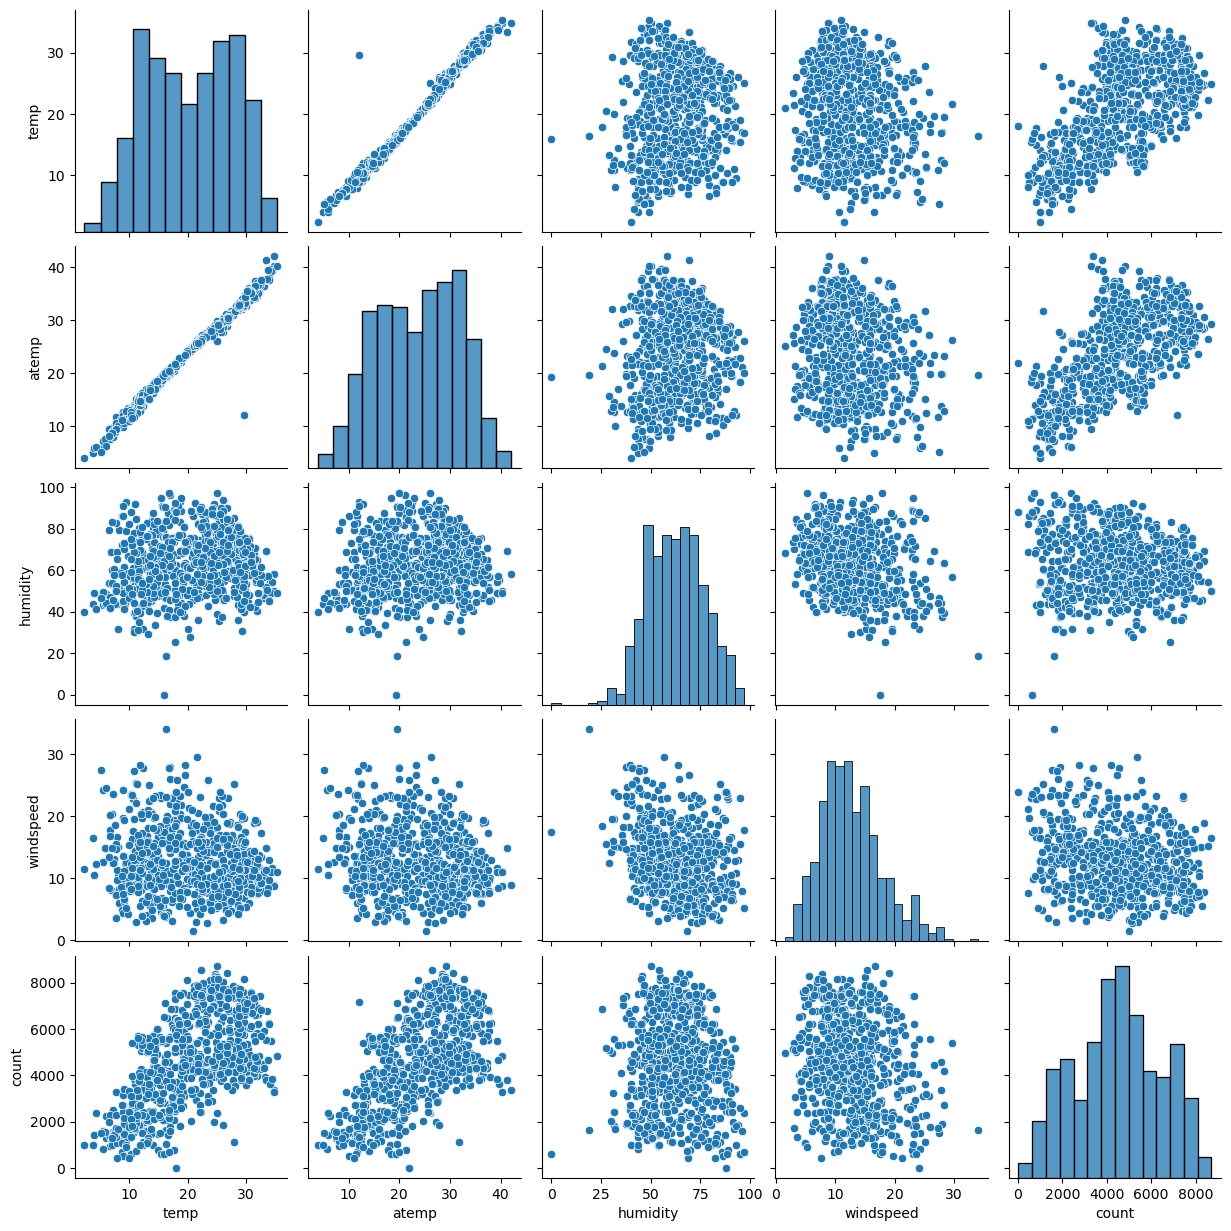

In [169]:
# Visualizing the data to identify any kind of pattern
#Plotting pairplot of all the numeric variables

sns.pairplot(bikeSharing_df[["temp","atemp","humidity","windspeed","count"]])
plt.show()

Looks like the temp and atemp has the highest corelation with the target variable cnt
temp and atemp are highly co-related with each other
As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.

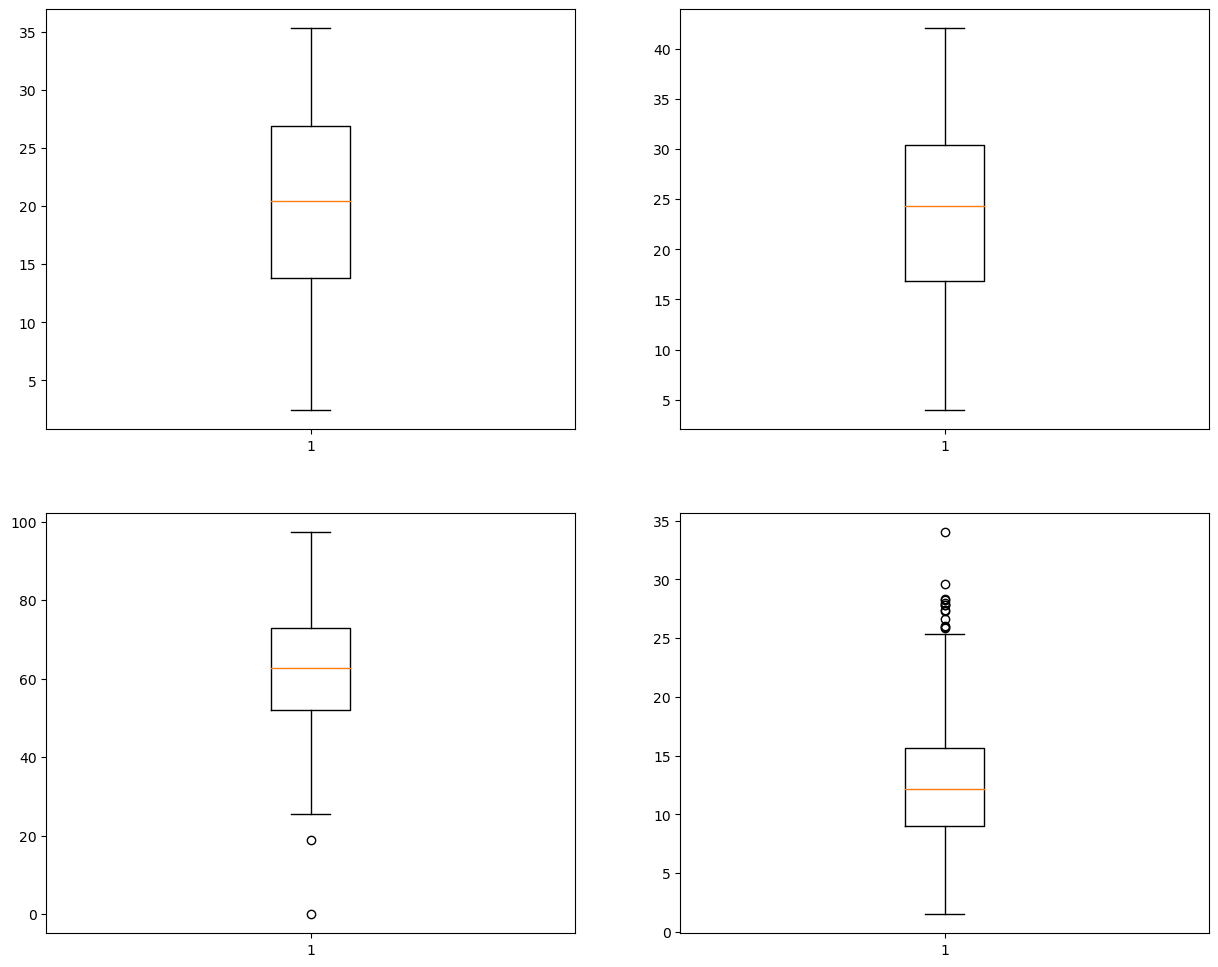

In [170]:
#Plotting box plot of continuous variables

plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.boxplot(bikeSharing_df["temp"])
plt.subplot(2,2,2)
plt.boxplot(bikeSharing_df["atemp"])
plt.subplot(2,2,3)
plt.boxplot(bikeSharing_df["humidity"])
plt.subplot(2,2,4)
plt.boxplot(bikeSharing_df["windspeed"])
plt.show()

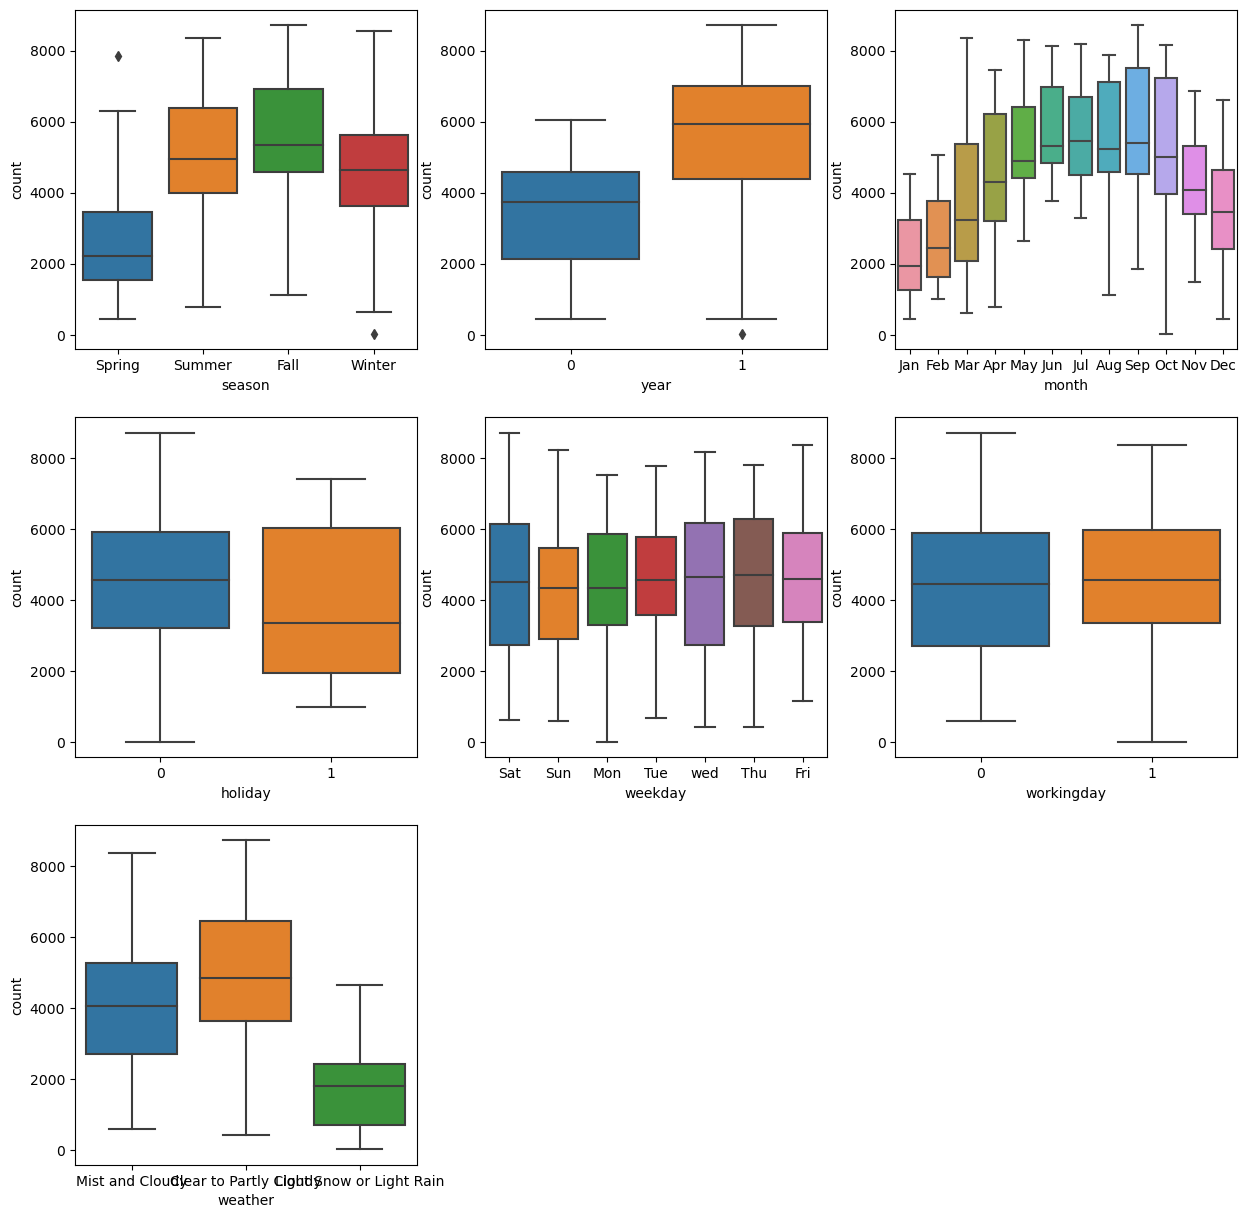

In [244]:
#Plotting box plot of categorical variables
vars_cat = ['season','year','month','holiday','weekday','workingday','weather']

plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='count')
plt.show()

`Inferance`: <br>
Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

### Find the Correlation between the Numerical Variable

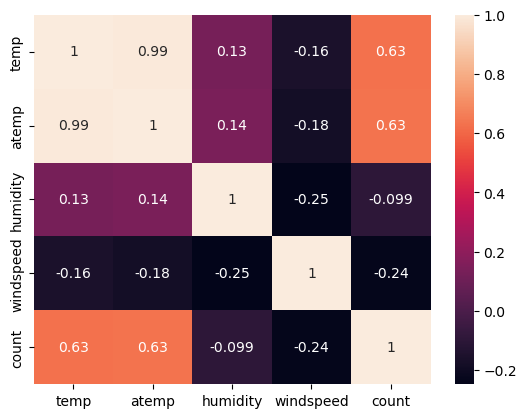

In [172]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','humidity','windspeed','count']].corr(),  annot = True)
plt.show()

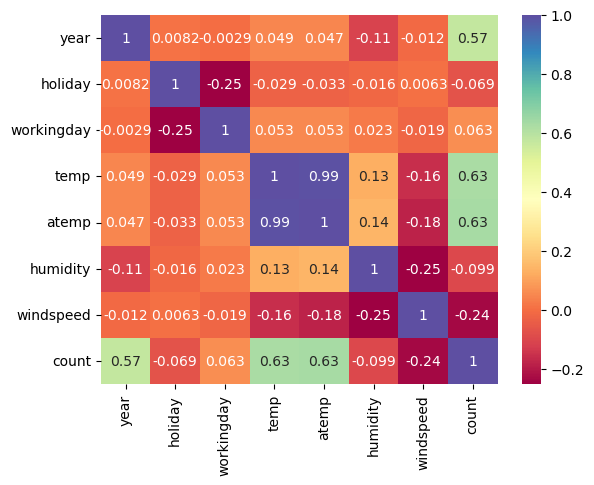

In [173]:
cor= bikeSharing_df.corr()
sns.heatmap(cor, cmap="Spectral", annot = True)
plt.show()

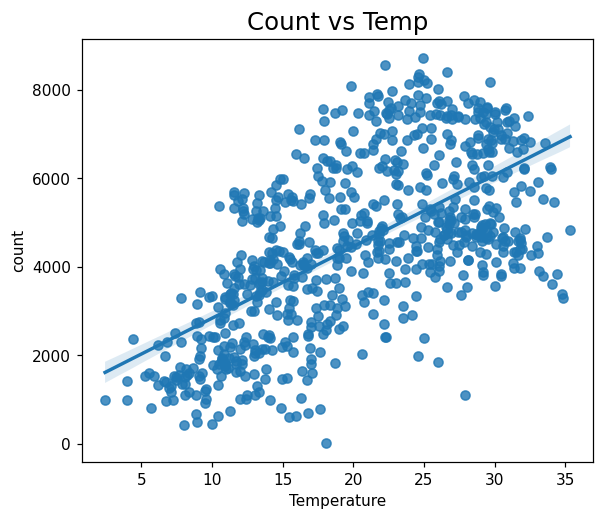

In [174]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="count",x="temp")
plt.xlabel("Temperature")
plt.show()

- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

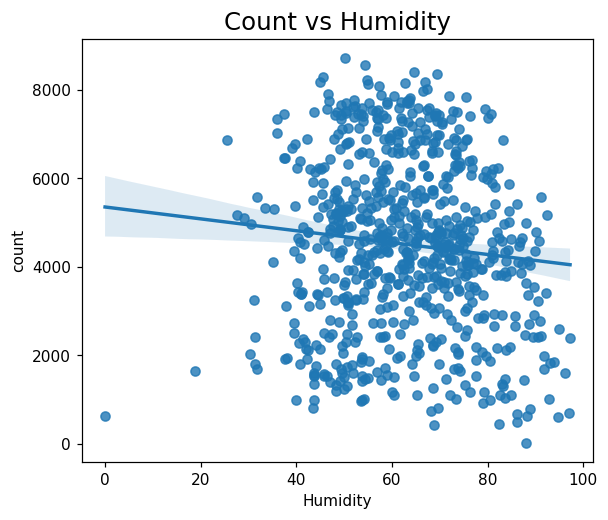

In [175]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Humidity",fontsize=16)
sns.regplot(data=bikeSharing_df,y="count",x="humidity")
plt.xlabel("Humidity")
plt.show()

- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

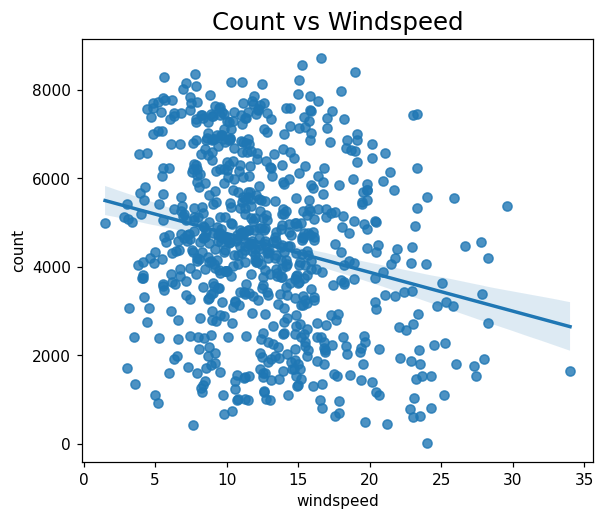

In [245]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Count vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="count",x="windspeed")
plt.show()

In [246]:
bikeSharing_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

### Section 4: Data Preparation for Linear Regression
##### Create dummy variables for all categorical variables

In [247]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","month","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weather"])

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [248]:
# printing sample data
bikeSharing_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_wed,weather_Clear to Partly Cloudy,weather_Light Snow or Light Rain,weather_Mist and Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


### Section 5: Model building

In [249]:
# checking shape before spliting
bikeSharing_df.shape

(730, 31)

In [250]:
# Spliting training and test data

#y to contain only target variable
y=bikeSharing_df.pop('count')

#X is all remainign variable also our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [251]:

# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)


(511, 30)
(219, 30)


In [252]:
X.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_wed,weather_Clear to Partly Cloudy,weather_Light Snow or Light Rain,weather_Mist and Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


### Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
temp,hum,windspeed

In [253]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [254]:
# Let us scale continuous variables
num_vars = ['temp','atemp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [255]:
#Inspect stats fro Training set after scaling
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_wed,weather_Clear to Partly Cloudy,weather_Light Snow or Light Rain,weather_Mist and Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.624266,0.029354,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.484786,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_wed,weather_Clear to Partly Cloudy,weather_Light Snow or Light Rain,weather_Mist and Cloudy
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


### Build a Model using RFE and Automated approach

##### Use RFE to eliminate some columns

In [257]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [258]:
#Cut down number of features to 15 using automated approach

rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [259]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 7),
 ('season_Winter', True, 1),
 ('month_Aug', False, 11),
 ('month_Dec', True, 1),
 ('month_Feb', False, 14),
 ('month_Jan', False, 10),
 ('month_Jul', False, 2),
 ('month_Jun', False, 16),
 ('month_Mar', False, 5),
 ('month_May', False, 13),
 ('month_Nov', True, 1),
 ('month_Oct', False, 6),
 ('month_Sep', False, 3),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 8),
 ('weekday_wed', False, 12),
 ('weather_Clear to Partly Cloudy', True, 1),
 ('weather_Light Snow or Light Rain', True, 1),
 ('weather_Mist and Cloudy', True, 1)]

### Manual elimination

In [260]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#### Function to calculate VIFs and print them

In [261]:
def get_vif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [193]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_Spring', 'season_Winter', 'month_Dec', 'month_Nov',
       'weekday_Sat', 'weekday_Sun', 'weather_Clear to Partly Cloudy',
       'weather_Light Snow or Light Rain', 'weather_Mist and Cloudy'],
      dtype='object')

In [194]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'season_Summer', 'month_Aug', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Thu', 'weekday_Tue',
       'weekday_wed'],
      dtype='object')

### Step 6. Build Model
#### Model 1 Start with all variables selected by RFE

In [269]:
cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_Spring','season_Summer','season_Winter', 'month_Jan', 'month_Jul', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.52e-183
Time:                        16:01:30   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

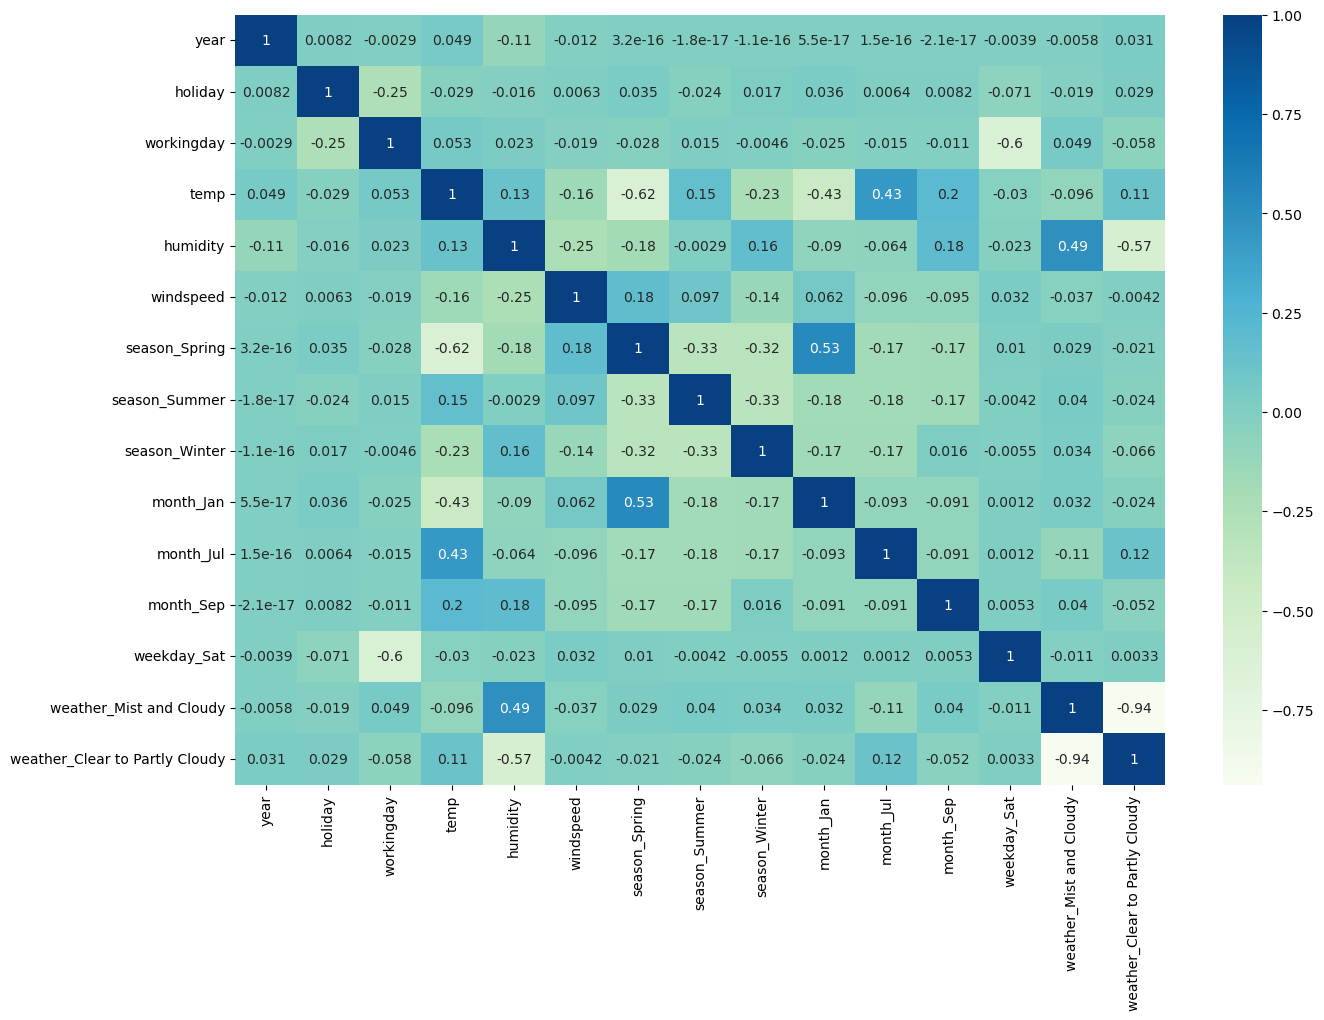

In [270]:
# Checking correlation of features selected by RFE with target column. 

plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing_df[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_Spring','season_Summer','season_Winter', 'month_Jan', 'month_Jul', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']].corr(), cmap='GnBu', annot=True)
plt.show()

#### Model 2

In [271]:
# Dropping the variable month_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_Spring','season_Summer','season_Winter', 'month_Jan', 'month_Jul', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.52e-183
Time:                        16:03:05   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 3
##### All the columns have p-value > .05 so checking VIFs

In [272]:
# Dropping the variable humidity as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'holiday', 'workingday', 'temp', 'windspeed',
       'season_Spring','season_Summer','season_Winter', 'month_Jul', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.46e-181
Time:                        16:03:51   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Module 4

In [273]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'workingday', 'temp', 'windspeed',
       'season_Spring','season_Summer','season_Winter', 'month_Jul', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.56e-182
Time:                        16:05:20   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 5

In [274]:
# Dropping the variable month_Jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'workingday', 'temp', 'windspeed',
       'season_Spring','season_Summer','season_Winter', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.57e-182
Time:                        16:05:55   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 6

In [276]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['year', 'workingday',  'windspeed',
       'season_Spring','season_Summer','season_Winter', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.84e-150
Time:                        16:07:01   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 7

In [280]:
# replace July with spring as both were highly correlated
cols = ['year', 'workingday',  'windspeed','month_Jul',
       'season_Summer','season_Winter', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           3.93e-97
Time:                        16:09:43   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 8

In [281]:
# replace July with spring as both were highly correlated

cols = ['year', 'workingday',  'windspeed','season_Spring',
       'season_Summer','season_Winter', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.84e-150
Time:                        16:11:39   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 9

In [283]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['year', 'workingday','season_Spring',
       'season_Summer','season_Winter', 'month_Sep', 'weekday_Sat',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     172.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.13e-147
Time:                        16:12:47   Log-Likelihood:                -4232.8
No. Observations:                 511   AIC:                             8486.
Df Residuals:                     501   BIC:                             8528.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 10

In [287]:
 #using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['year', 'workingday','season_Spring',
       'season_Summer','season_Winter', 'month_Sep', 'weekday_Sun',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     169.8
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.32e-146
Time:                        16:13:58   Log-Likelihood:                -4235.2
No. Observations:                 511   AIC:                             8490.
Df Residuals:                     501   BIC:                             8533.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Model 11

In [288]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['year', 'workingday','season_Spring',
       'season_Winter', 'month_Sep', 'weekday_Sun',
      'weather_Mist and Cloudy' ,'weather_Clear to Partly Cloudy','temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.73e-177
Time:                        16:15:00   Log-Likelihood:                -4161.5
No. Observations:                 511   AIC:                             8343.
Df Residuals:                     501   BIC:                             8385.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821
Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [289]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [290]:
#Let us build the finalmodel using sklearn
cols = ['year', 'temp', 'windspeed',
       'season_Spring', 'month_Aug', 'month_Jul', 'month_Jun', 'weekday_Sat',
       'weekday_Sun', 'weather_Clear to Partly Cloudy',
       'weather_Light Snow or Light Rain']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1836.1130905585987 [ 1999.24975845  4042.02873266  -928.96710207 -1452.32342851
  -655.12386799  -927.92928253  -422.30645132    68.51646305
  -288.20040443   669.3252633  -1509.53333423]


### Step 7:Model Evaluation

In [210]:
y_train_pred = lr.predict(X_train[cols])

In [291]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.displot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

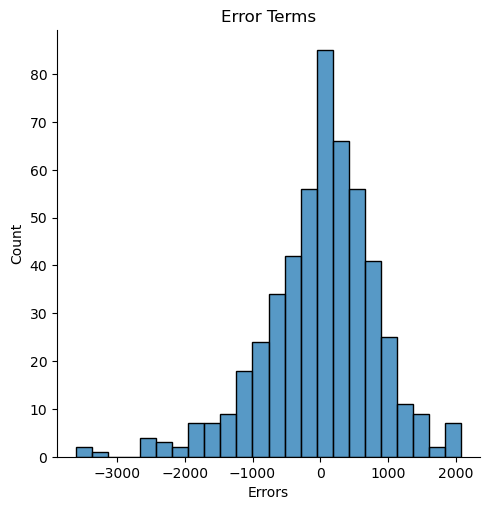

In [212]:
plot_res_dist(y_train, y_train_pred)
plt.show()

#### Errors are normally distribured here with mean 0. So everything seems to be fine

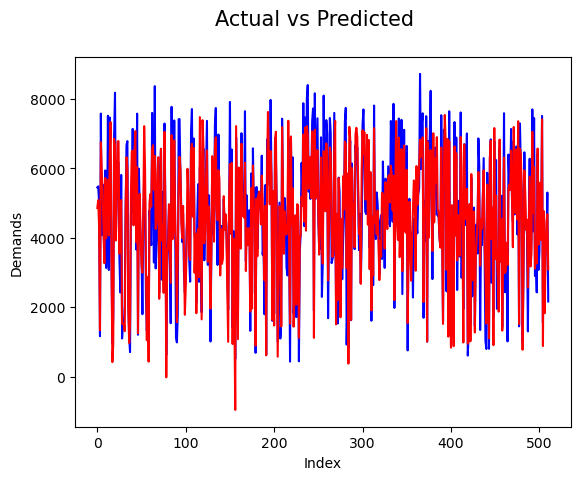

In [292]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

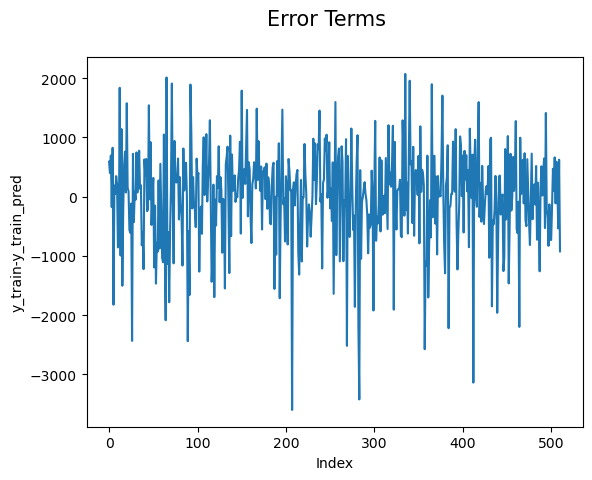

In [214]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Here,If we see the error terms are independent of each other.

In [293]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8205755995081813

### _`Inference`_
R2 Same as we obtained for our final model

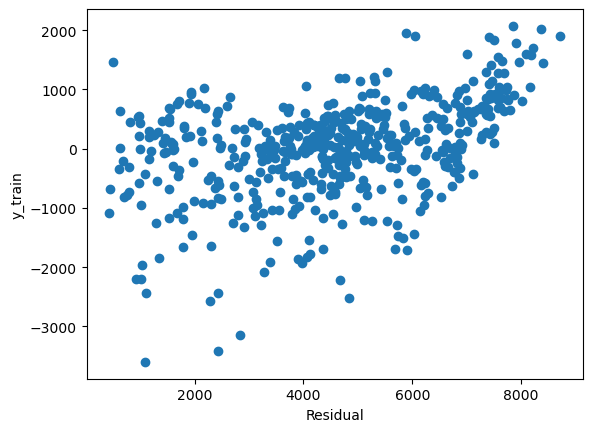

In [294]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for test data set

In [295]:
#Scale variables in X_test
num_vars = ['temp','atemp','humidity','windspeed']


#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [296]:
#Columns from our final model
cols = ['year', 'temp', 'windspeed',
       'season_Spring', 'month_Aug', 'month_Jul', 'month_Jun', 'weekday_Sat',
       'weekday_Sun', 'weather_Clear to Partly Cloudy',
       'weather_Light Snow or Light Rain']



#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [297]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8200784890995165

Text(0, 0.5, 'y_test_pred')

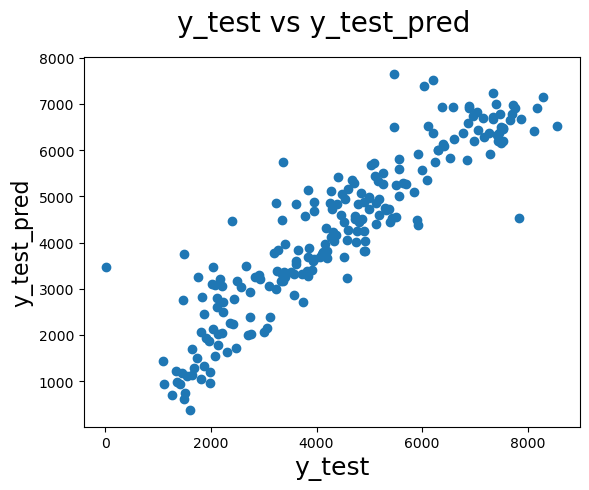

In [298]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Plot Test vs Predicted test values

In [222]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

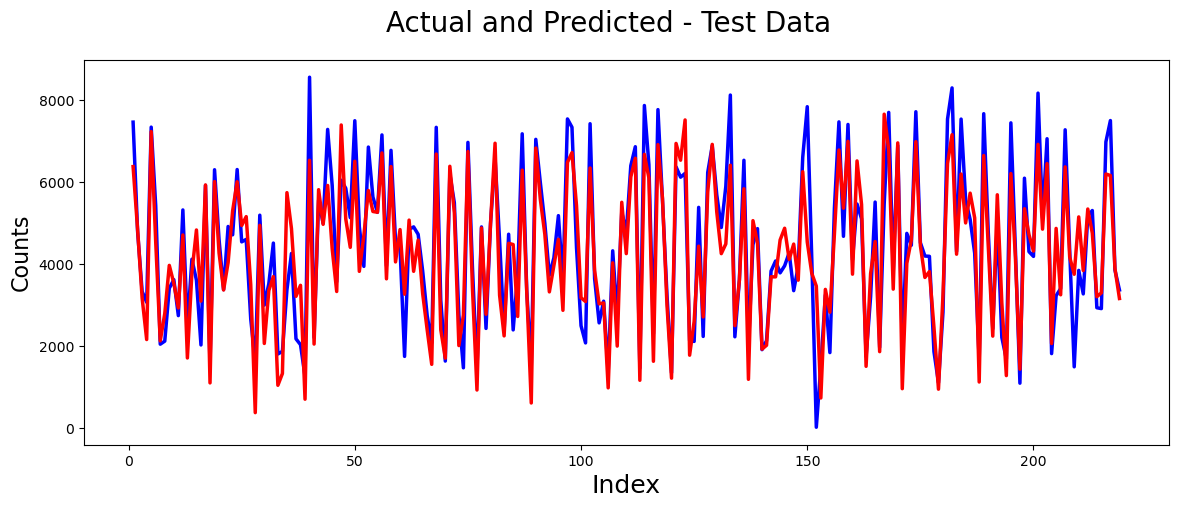

In [223]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

### Plot Error Terms for test data

In [224]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

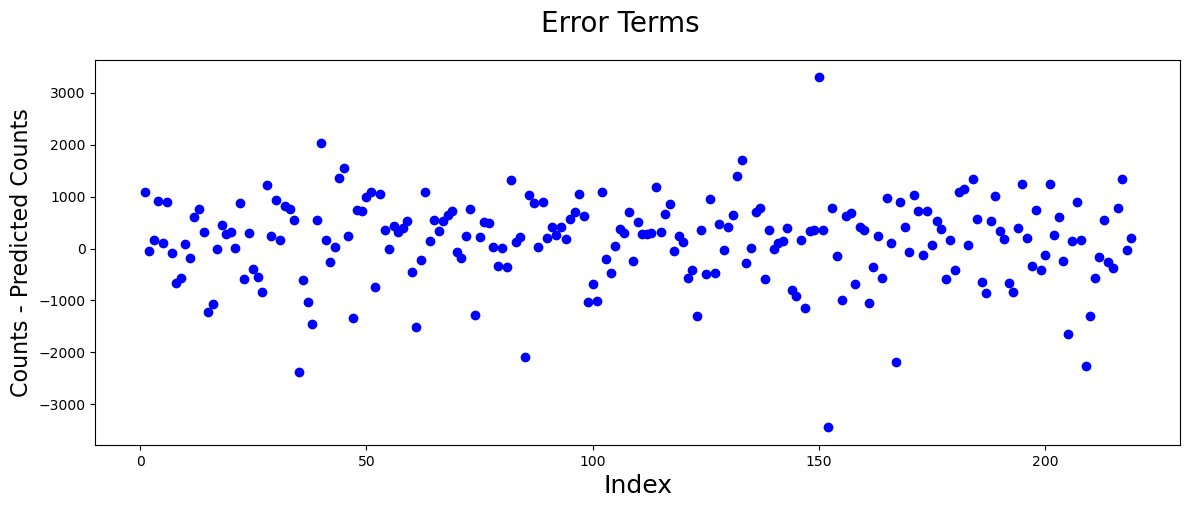

In [225]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### Step 8: # Making Predictions



In [226]:
# Checking data before scaling
bikeSharing_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_wed,weather_Clear to Partly Cloudy,weather_Light Snow or Light Rain,weather_Mist and Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [227]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['year', 'temp', 'windspeed',
       'season_Spring', 'month_Aug', 'month_Jul', 'month_Jun', 'weekday_Sat',
       'weekday_Sun', 'weather_Clear to Partly Cloudy',
       'weather_Light Snow or Light Rain']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.53e-178
Time:                        14:49:53   Log-Likelihood:                -4153.7
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     499   BIC:                             8382.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)

In [228]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              730 non-null    int64  
 1   holiday                           730 non-null    int64  
 2   workingday                        730 non-null    int64  
 3   temp                              730 non-null    float64
 4   atemp                             730 non-null    float64
 5   humidity                          730 non-null    float64
 6   windspeed                         730 non-null    float64
 7   season_Spring                     730 non-null    uint8  
 8   season_Summer                     730 non-null    uint8  
 9   season_Winter                     730 non-null    uint8  
 10  month_Aug                         730 non-null    uint8  
 11  month_Dec                         730 non-null    uint8  
 12  month_Fe